In [7]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format='svg'
#%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.stats import LombScargle
plt.style.use('seaborn-whitegrid')


In [3]:
import numpy as np
from astropy import units as u
from astropy.time import Time
from datetime import datetime


# information for Mrk1018

In [ ]:
one of only four sources known to have changed spetrum state twice

NED 02h06m16.0s -00d17m29s G       12722  0.042436
Husemann et al.2016 (z=0.035)



1979-1984 2009-2015
1.9 -1        -1.9


2-10keV
2010    -2016
1.46e-11 1.31e-12

Fe Ka EW
0.18 -0.61

Mid-infrared WISE flux
3.4mum 4.6mum
decrease between 2010 and 2015


grppha src.pi src_c15.pi comm="group min 15 & exit"
grppha src.pi src_c15.pi comm="group min 10 & exit"






In [3]:
mrk1018=pd.read_excel('/Users/brettlv/Downloads/vla_archival_survey.xlsx',sheet_name='Sheet1')

In [8]:
data=pd.read_excel('/Users/brettlv/Downloads/vla_archival_survey.xlsx',sheet_name='Sheet5')
dataxrt=pd.read_excel('/Users/brettlv/Downloads/vla_archival_survey.xlsx',sheet_name='Sheet6')
datachandra=pd.read_excel('/Users/brettlv/Downloads/vla_archival_survey.xlsx',sheet_name='Sheet7')

In [9]:
print(dataxrt.head())

  target id     obsid           ra          dec             start time  \
0     88207  88207001  02 06 07.29  -00 17 49.7  2018-01-06 12:53:26.9   
1     30955  30955003  02 06 32.62  -00 21 42.6  2007-06-24 18:42:58.3   
2     88207  88207003  02 06 16.94  -00 16 41.1  2018-07-17 21:08:31.8   
3     88207  88207002  02 06 09.17  -00 15 04.9  2018-02-24 13:20:56.3   
4     30955  30955003  02 06 32.62  -00 21 42.6  2007-06-24 17:11:04.1   

     exposure window size operation mode pointing mode flipflop  \
0  1700.65655     600x600         PHOTON      pointing        N   
1  1673.16945     500x500         PHOTON      pointing        N   
2  1635.71321     600x600         PHOTON      pointing        N   
3  1610.74482     600x600         PHOTON      pointing        N   
4  1605.74294     500x500         PHOTON      pointing        N   

      Search Offset  Unnamed: 11  xrt  
0  2.201 (Mrk 1018)          NaN  NaN  
1  5.926 (Mrk 1018)          NaN  NaN  
2  0.837 (Mrk 1018)          NaN

In [6]:
print(data.head())

               Archive File  Status Project  Seg    Obs. Data Starts  \
0                       NaN     NaN     NaN  NaN                 NaN   
1    VLA_XH78003_file19.dat  public    JOHN    J  78-Jun-25 18:01:30   
2    VLA_XH78003_file19.dat  public    JOHN    J  78-Jun-25 21:32:40   
3    VLA_XH84016_file16.dat  public  AB0276    D  84-Jul-16 09:13:30   
4    VLA_XH84025_file21.dat  public  AU0020    B  84-Nov-28 03:32:19   

      Obs. Data Stops File Size   Telescope: Bands   Format Type  Data   View  \
0                 NaN       NaN  config:sub"   NaN      NaN  NaN  Qual  Scans   
1  78-Jun-26 14:30:10   20.74MB      VLA:?:1     C  VLA Exp  raw    OK  Scans   
2  78-Jun-26 14:30:10    8.45MB      VLA:?:2     U  VLA Exp  raw    OK  Scans   
3  84-Jul-16 13:02:30    9.19MB     VLA:CD:1     C  VLA Exp  raw    OK  Scans   
4  84-Nov-28 07:11:30   26.44MB      VLA:A:1   L C  VLA Exp  raw    OK  Scans   

   Logs  
0  etc.  
1  Logs  
2  Logs  
3  Logs  
4  Logs  


In [7]:
print(data.shape[1]) #查看列数
print(data.shape[0]) #查看行数

14
518


In [8]:
print(data.columns)

Index(['Archive File', 'Status', 'Project', 'Seg', 'Obs. Data Starts',
       'Obs. Data Stops', 'File Size', 'Telescope:', 'Bands', 'Format', 'Type',
       'Data', 'View', 'Logs'],
      dtype='object')


In [10]:
datestart=data['Obs. Data Starts']
datestop=data['Obs. Data Stops']


In [11]:
datexrtstart=dataxrt['start time']
datechandrastart=datachandra['time']

In [12]:
datexrtnew=pd.to_datetime(datexrtstart)
datechanew=pd.to_datetime(datechandrastart)

In [13]:
import matplotlib.pyplot as plt
import time
from datetime import datetime
from dateutil.parser import parse
#plt.plot(datestart[1:42])

In [213]:
datestart[1:3],datestart[40:45]

(1    78-Jun-25 18:01:30
 2    78-Jun-25 21:32:40
 Name: Obs. Data Starts, dtype: object, 40     98-Dec-24 01:10:39
 41     99-Mar-02 00:34:49
 42     99-Mar-02 00:35:20
 43    2018-03-02 19:30:19
 44    2018-03-02 21:56:26
 Name: Obs. Data Starts, dtype: object)

In [214]:
datestart[40]

'98-Dec-24 01:10:39'

In [215]:
parse(datestart[42])

datetime.datetime(1999, 3, 2, 0, 35, 20)

In [115]:
241/100,241//100,241%100

(2.41, 2, 41)

In [14]:
dd=[]
yy=[]
mm=[]
HH=[]
MM=[]
SS=[]
datenew=[]

for i in datestart[43:201]:
    dd.append(i.year%100)
    mm.append(i.month)
    yy.append(i.day)
    HH.append(i.hour)
    MM.append(i.minute)
    SS.append(i.second) 
    datenew.append(datetime(i.day+2000,i.month,i.year%100,i.hour,i.minute,i.second))
      
datexrtnews=[]
for i in datexrtnew:
    datexrtnews.append(datetime(i.year,i.month,i.day,i.hour,i.minute,i.second))
     
datechanews=[]
for i in datechanew:
    datechanews.append(datetime(i.year,i.month,i.day,i.hour,i.minute,i.second))


In [22]:
datatelescope=data['Telescope:'][43:201]
databand=data['Bands'][43:201]

In [36]:
head = ["vlatime" , "vlaconf" , "vlaband"]
l = [datevla,datavlaconf,datavlaband]
df = pd.DataFrame(l , index = head).T
df.to_csv("Mrkvla.csv" , encoding = "utf-8")

In [25]:
datevla=[]
datavlaconf=[]
datavlaband=[]
for i,(x_,y_,z_) in enumerate(zip(datenew,datatelescope,databand)):
    if y_.find('VLA')>=0:
        datevla.append(x_)
        datavlaconf.append(y_)
        datavlaband.append(z_)
        print(x_,y_,'Band:',z_)

2002-03-18 19:30:19 VLA:A:1 Band: L C X U
2002-03-18 21:56:26 VLA:A:1 Band: L C X U
2002-03-24 16:50:43 VLA:A:1 Band: L
2002-03-29 15:38:49 VLA:A:1 Band: X
2002-07-19 10:38:00 VLA:B:1 Band: L
2002-07-21 12:52:49 VLA:B:1 Band: L
2002-07-27 09:16:44 VLA:B:1 Band: L
2002-08-03 08:33:19 VLA:B:1 Band: L
2002-08-03 12:08:30 VLA:B:1 Band: L
2002-08-04 09:26:25 VLA:B:1 Band: L
2002-08-05 09:54:49 VLA:B:1 Band: L
2002-08-08 08:54:45 VLA:B:1 Band: L
2002-09-20 03:16:29 VLA:BC:1 Band: X Q
2004-01-16 00:00:00 VLA:B:1 Band: L
2004-05-30 13:38:10 VLA:CD:1 Band: X
2004-11-28 03:14:50 VLA:A:1 Band: X
2006-09-08 09:18:09 VLA:B:1 Band: 4
2006-09-09 07:32:49 VLA:B:1 Band: X
2006-09-14 08:11:19 VLA:B:1 Band: X
2007-08-20 11:17:59 VLA:A:1 Band: L
2007-08-24 11:32:30 VLA:A:1 Band: L
2007-09-05 08:45:40 VLA:A:1 Band: C
2008-06-21 01:12:56 VLA:DnC:1 Band: C X
2008-07-25 08:57:26 VLA:D:1 Band: X K
2008-08-07 11:36:23 VLA:D:1 Band: X Q
2008-09-29 02:36:50 VLA:D:1 Band: L
2008-11-18 01:21:59 VLA:A:1 Band: C
2008

![avatar](http://baidu.com/pic/doge.png)
<img src="http://baidu.com/pic/doge.png">


In [16]:
len(datenew),len(datexrtstart),len(datechandrastart)

(158, 467, 11)

In [19]:
tmjd1=Time([53587],format='mjd')
tmjd2=Time([57436],format='mjd')
tmjd3=Time([54271],format='mjd')

tmjd1.datetime,tmjd2.datetime,tmjd3.datetime

(array([datetime.datetime(2005, 8, 5, 0, 0)], dtype=object),
 array([datetime.datetime(2016, 2, 18, 0, 0)], dtype=object),
 array([datetime.datetime(2007, 6, 20, 0, 0)], dtype=object))

In [18]:
for i_,j_,z_ in zip(dataxrt['obsid'],datexrtnews,dataxrt['exposure']):
    print(i_,j_,z_)

88207001 2018-01-06 12:53:26 1700.65655
30955003 2007-06-24 18:42:58 1673.16945
88207003 2018-07-17 21:08:31 1635.71321
88207002 2018-02-24 13:20:56 1610.74482
30955003 2007-06-24 17:11:04 1605.74294
80898001 2016-02-11 00:32:10 1298.5869
30955002 2007-06-22 23:21:03 1188.70078
30955002 2007-06-22 21:45:03 1188.7001
49654004 2014-06-09 18:10:14 1158.73709
35776035 2018-10-22 07:27:36 1151.24933
30955002 2007-06-22 20:08:46 1146.24586
80898002 2016-02-16 03:23:20 1108.79525
80898002 2016-02-16 00:11:28 1101.30308
35776040 2018-10-31 22:50:53 1076.32734
35776020 2018-10-01 07:51:07 1061.34673
35776029 2018-10-11 18:08:15 1053.85165
35776034 2018-10-21 20:32:28 1041.36551
35776045 2018-11-05 20:30:30 1038.87354
35776044 2018-11-04 11:08:39 1028.88398
35776054 2018-11-17 10:10:41 1028.8832
35776037 2018-10-27 08:41:00 1008.90249
35776047 2018-11-07 22:14:17 991.42277
35776033 2018-10-19 22:06:23 986.42701
35776004 2018-09-03 23:23:23 986.42474
35776015 2018-09-23 19:48:28 981.43222
4965400

In [ ]:
xrtpipeline Version: 0.13.4 Release Date: 2017-03-15

# obs_time_coverage

/Users/brettlv/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


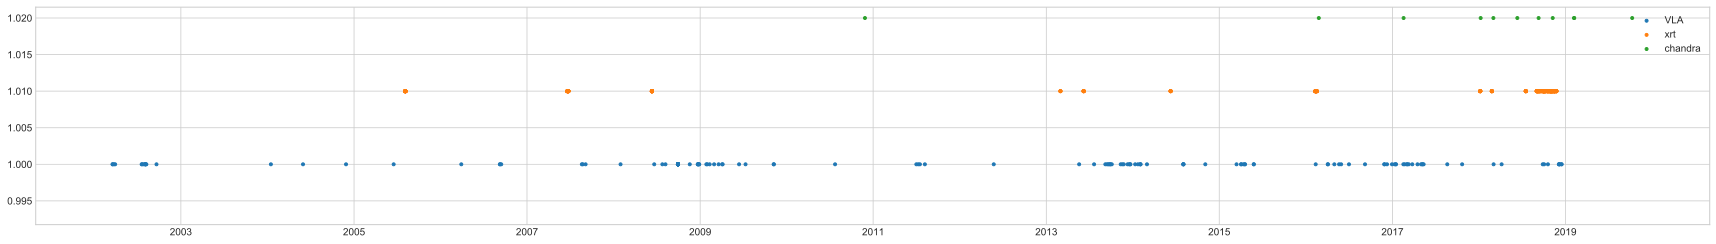

In [20]:
plt.figure(figsize=(30,4))
plt.scatter(datenew,np.ones(len(datenew)),marker='.',label='VLA')
plt.scatter(datexrtnews,np.ones(len(datexrtnews))+0.01,marker='.',label='xrt')
plt.scatter(datechanews,np.ones(len(datechanews))+0.02,marker='.',label='chandra')
plt.legend()
plt.show()

In [135]:
ls /Users/brettlv/Downloads/Mrk1018photometricdata.png

/Users/brettlv/Downloads/Mrk1018photometricdata.png


# optical photometry

![mrk1018](../../../Downloads/Mrk1018photometricdata.png)

# x-ray flux and $\Gamma$

![mrk1018](../../../Downloads/Mrk1018x-rayfluxandgamma.png)

In [ ]:
![Mrk1018_photometric](/Users/brettlv/Downloads/Mrk1018photometricdata.png)
<img src="/i/eg_tulip.jpg"  alt="上海鲜花港 - 郁金香" />
<img src="/Users/brettlv/Downloads/Mrk1018photometricdata.png" alt="1018"/>

In [147]:
len(datenew)

158

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
img=Image.open('/Users/brettlv/Downloads/Mrk1018photometricdata.png')

plt.figure("Mrk1018",figsize=(20,12))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
img=Image.open('/Users/brettlv/Downloads/Mrk1018x-rayfluxandgamma.png')

plt.figure("Mrk1018",figsize=(20,12))
plt.imshow(img)
plt.axis('off')
plt.show()

In [165]:
print(img.size)  #图片的尺寸
print(img.mode) #图片的模式
print(img.format)  #图片的格式

(1462, 1154)
RGBA
PNG


# For nustar
src 45"
min group bin 15counts

In [3]:
import numpy as np
from astropy import units as u
from astropy.time import Time
from datetime import datetime
tmjd1=Time([55527],format='mjd')
tmjd2=Time([57436],format='mjd')
tmjd1.datetime,tmjd2.datetime

(array([datetime.datetime(2010, 11, 27, 0, 0)], dtype=object),
 array([datetime.datetime(2016, 2, 18, 0, 0)], dtype=object))

# Chandra_obs

2" for 2010 correspond to 4ACIS pixels 2.4counts/s pile up  
3" for 2016 later observation 
bkg annulus inner 5" outer 15"




In [ ]:
alias ciao="source /Users/brettlv/ciao/ciao-4.10/bin/ciao.bash" 
ciao
find_chandra_obsid Mrk1018
# obsid  sepn   inst grat   time    obsdate    piname     target
12868     0.0 ACIS-S NONE   22.7 2010-11-27 Mushotzky "Mrk 1018"
18789     0.0 ACIS-S NONE   27.2 2016-02-25  Tremblay "Mrk 1018"
19560     0.0 ACIS-S NONE   48.6 2017-02-17    Krumpe "Mrk 1018"
20366     0.0 ACIS-S NONE   18.2 2018-01-08    Krumpe    Mrk1018
20367     0.0 ACIS-S NONE   17.3 2018-03-03    Krumpe    Mrk1018
20368
download_chandra_obsid 20366,20367


sherpa
notice(0.3, 10.0)
plot_data()

subtract()
set_stat("chi2datavar”)
group_counts(20)

plot_data()
set_xlog()
set_ylog()

log_scale(XY_AXIS)
log_scale(X_AXIS)
log_scale(Y_AXIS)

get_data_plot_prefs()["xlog"] = True
get_data_plot_prefs()["ylog"] = True

set_source(xsphabs.a1*xspowerlaw.p1)
fit()
plot_fit()
plot_fit_delchi()
conf()

calc_photon_flux(2., 10.) 
calc_energy_flux(2., 10.)
         
l1.pos=6.37         
         
         

In [ ]:
chandra_repro 20366 outdir=
punlearn ardlib

# Swift/xrt

radius 25"
bkg 30",40"
group min bin 15
fk5
circle(2:06:15.982,-0:17:30.372,25.000")
annulus(2:06:15.982,-0:17:30.372,30",40")

http://adsabs.harvard.edu/abs/2009MNRAS.397.1177E
    
	
Methods and results of an automatic analysis of a complete sample of Swift-XRT observations of GRBs    

Source extraction radii used for given PC-mode
count rates. R is the measured, uncorrected count rate. This
table is reproduced from Evans et al. (2007). Values are given
in XRT pixels and arcseconds: one XRT pixel corresponds to
2.36 arcsec.
Count rate R (counts s−1) Source radius in pixels (arcsec)
R > 0.5 30 (70.
8)
0.1 < R ≤ 0.5 25 (59.
0)
0.05 < R ≤ 0.1 20 (47.
2)
0.01 < R ≤ 0.05 15 (35.
4)
0.005 < R ≤ 0.01 12 (28.
3)
0.001 < R ≤ 0.005 9 (21.
2)
0.0005 < R ≤ 0.001 7 (16.
5)
R ≤ 0.0005 5 (11.
8)

In [204]:
nums = ['flower','flowed','flight']
for i in zip(*nums):
    print(i)

('f', 'f', 'f')
('l', 'l', 'l')
('o', 'o', 'i')
('w', 'w', 'g')
('e', 'e', 'h')
('r', 'd', 't')


# XMM

In [ ]:
obsid	status	name	ra	dec	time	duration	pi lname	pi fname	public date	data in heasarc	Search Offset		xmm
821240201	processed	Mrk 1018	02 06 16.00	-00 17 29.0	2018-07-23 11:24:28	74800	Krumpe	Mirko	12/02/2020	N	0.004 (Mrk 1018)		
821240301	processed	Mrk 1018	02 06 16.00	-00 17 29.0	2019-01-04 15:19:45	67700	Krumpe	Mirko	12/02/2020	N	0.004 (Mrk 1018)		
201090201	archived	MKN 1018	02 06 16.00	-00 17 29.0	2005-01-15 18:17:05	11920	BARCONS	XAVIER	14/06/2006	Y	0.005 (Mrk 1018)		
554920301	archived	Mrk 1018	02 06 16.00	-00 17 29.0	2008-08-07 02:28:50	17621	Corral	Amalia	01/09/2009	Y	0.005 (Mrk 1018)		

打开文件：

Excel：双击文件打开
Python：data = pd.read_excel('XXX.xlsx', sheet_name='工作表1')
data属于<class 'pandas.core.frame.DataFrame'>类型


基本信息查看-简单查看：

Excel：简单查看
Python：print(data.head()) #简单查看前5行
基本信息查看-行/列数：

Excel：点击某行/列，查看计数值
Python：
print(data.shape[1]) #查看列数
print(data.shape[0]) #查看行数
基本信息查看-单元格数：

Excel：全选表格内容，查看计数值
Python：print(data.size)
基本信息查看-列名称：

Excel：查看列名称
Python：print(data.columns)
基本信息查看-查看某行/列具体信息：

Excel：查看某行/列具体信息
Python：
print(data['XXX']) #查看某列具体信息 
print(data[1:2]) #查看某行具体信息 
print(data.iloc[0]) #查看某行具体信息(根据行号) 
print(data.loc[0]) #查看某行具体信息(根据索引)
'XXX'必须为具体的列名称
基本信息查看-查看某（一个或多个）单元格具体信息：

Excel：查看某（一个或多个）单元格具体信息
Python：print(data.loc[[0,2],['XXX','YYY']]) #0和2行，'XXX'和'YYY'列对应的信息
基本信息查看-查看某块（N*M）单元格具体信息：

Excel：查看某块(N*M)单元格具体信息
Python：print(data.iloc[0:3,0:3]) #查看0~2行和0~2列之间的区域
pd.iloc[i,j] i,j 只能是数字，即原始索引
pd.loc[i,'j'] i,j既可以是数字，也可是字母，即索引标签


信息筛选-列信息筛选：

Excel：数据筛选
Python：data = data[(http://data.XXX >=20) & (http://data.XXX <=30) & (data.YYY.isin(['A','B']))]
XXX筛选数据范围，YYY筛选条件(取反在前面加 ~，~data.YYY.isin(['A','B']) )


信息删除-删除某行/列：

Excel：删除行/列
Python：
data = data.drop([0,2,4,6,8]) #删除行
data = data.drop(columns=['XXX','YYY']) #删除列
信息删除-删除空值：

Excel：删除空值
Python：data = data.dropna(how ='any') #删除空值 how ='any'/'all'
'any'：如果存在任何NA值，则删除该行或列
'all'：如果所有值都是NA，则删除该行或列


信息插入-插入某行/列：

Excel：插入行/列
Python：
data['new'] = 0 #插入最后一列 
data.insert(1,'new',0) #指定位置插入一列


数据替换-替换空值：

Excel：选中->查找->替换
Python：data.fillna(0) #将所有空值用0（数字）填充
数据替换-替换某列的特定值：

Excel：选中->查找->替换
Python：
for i in range(data.shape[0]):
if data.loc[[i],['XXX']].values >=10:
data.loc[[i], ['XXX']] = 0


合并拆分列-多列合并为一列：

Excel：=A2&"-"&B2
Python：data['new'] = data['XXX'].map(str) + "-" +data['YYY'].map(str)
合并拆分列-一列拆分为多列：

Excel：分列->分隔符
Python：
data['XXX_split'] = data['XXX'].str.split('-')
data['XXX_split1'] = data['XXX_split'].str[0]
data['XXX_split2'] = data['XXX_split'].str[1]


排序：

Excel：排序（升/降）
Python：data = data.sort_values(by = ['XXX','YYY'], ascending = True) #ascending = True（升序）/False（降序）


内容匹配：

Excel：=vlookup(lookup_value,table_array,col_index_num,range_lookup)
Python：data = pd.merge(data1, data2, how='left', on=['XXX','YYY'])


数字格式处理：

Excel：=int（X）向下取整
Python：data['XXX'] = data['XXX'].astype(int)


透视表：

Excel：插入->数据透视表
Python：
data = pd.pivot_table(data,
index=['X','XX'], #行
columns=['Y','YY'], #列
values=['Z','ZZ'], #值
aggfunc=[np.sum,np.mean,len], #汇总 均值 计数
margins=True) #汇总信息 不需要汇总 False
来自：WALT（淡然）